https://stepik.org/lesson/1370095/step/8

w = [ 6.72521145  0.04001613 -0.30835061  0.10324907 -0.00739641]
Qe =  5.156438618560918
Qe max =  172.03050348969546
Q =  0.9359802301238274


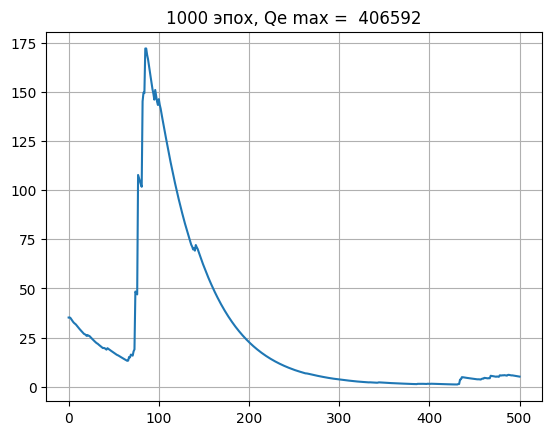

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return -0.5 * x ** 2 + 0.1 * x ** 3 + np.cos(3 * x) + 7


# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv


# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2


# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv

# Данные
coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

# # Матрица признаков
# X = [[x ** n for n in range(N)] for x in coord_x]
# Y = np.array(coord_y)

# Параметры
N = 5 # сложность модели (полином степени N-1)
lm_l1 = 2.0 # коэффициент лямбда для L1-регуляризатора
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N) # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# Вектор для lm_l1
lm_l1_vector = np.ones_like(w) * lm_l1
lm_l1_vector[0] = 0 # первый коэффициент не регуляризуем

Qe = np.mean([loss(w, x, y) for x, y in zip(coord_x, coord_y)]) # начальное качество
Q_plot = [Qe]

for _ in range(n_iter):
    k = np.random.randint(0, sz-batch_size-1)
    Xb = coord_x[k:k+batch_size]
    Yb = coord_y[k:k+batch_size]
    ek = np.array([loss(w, x, y) for x, y in zip(Xb, Yb)]).mean(axis=0) # вычисление потерь для батча
    grad = np.array([dL(w, x, y) for x, y in zip(Xb, Yb)]).mean(axis=0) # вычисление градиента потерь для батча
    Qe = lm * ek + (1 - lm) * Qe       # пересчет показателя качества
    w -= eta * (grad + lm_l1_vector * np.sign(w)) # обновить параметры модели
    Q_plot.append(Qe)

Q = np.mean([loss(w, x, y) for x, y in zip(coord_x, coord_y)]) # финальное качество

print('w =', w)
print('Qe = ', Qe)
print('Qe max = ', max(Q_plot))
print('Q = ', Q)

plt.plot(Q_plot)
plt.grid(True)
plt.title("1000 эпох, Qe max =  406592")
plt.show()

In [ ]:
# Vadim Kopeykin https://stepik.org/lesson/1370095/step/8?discussion=10529533&thread=solutions&unit=1386285
import numpy as np

def func(x): # исходная функция, которую нужно аппроксимировать моделью a(x)
    return -0.5 * x**2 + 0.1 * x**3 + np.cos(3 * x) + 7

def loss(w, X, y): # функция потерь
    return ((X @ w - y)**2).mean()

def dL(w, X, y): # производная функции потерь
    return 2 * (X @ w - y) @ X / len(X)

x = np.arange(-4.0, 6.0, 0.1)
y = func(x)

N = 5                    # сложность модели (полином степени N-1)
lm_l1 = np.ones(N) * 2.0 # коэффициент лямбда для L1-регуляризатора
lm_l1[0] = 0             # параметр w0 не регуляриpуем
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, ...
w = np.zeros(N) # начальные нулевые значения параметров модели
n_iter = 500    # число итераций алгоритма SGD
lm = 0.02       # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)

X = x.reshape(-1, 1) ** np.arange(N) # матрица пизнаков
Qe = loss(w, X, y)# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(n_iter):
    k = np.random.randint(len(X) - batch_size - 1) # сгенеировать индекс начала батча
    batch = np.arange(k, k + batch_size)           # индексы батча

    Qe += lm * (loss(w, X[batch], y[batch]) - Qe)  # обновить экспоненциальное среднее Qe
    w -= eta * (dL(w, X[batch], y[batch]) + lm_l1 * np.sign(w)) # обновить параметры модели

Q = loss(w, X, y) # вычислить итоговое значение среднего эмпирического риска

print('Qe =', Qe)
print('Q =', Q)
print('w = ', w.round(4))

Qe = 5.156438618561034
Q = 0.9359802301238376
w =  [ 6.7252  0.04   -0.3084  0.1032 -0.0074]


In [ ]:
# @title Матрица признаков - быстрый способ
import numpy as np

# Данные
coord_x = np.arange(-4.0, 6.0, 0.1) # интервал от -4 до 6
X = np.array([[x ** n for n in range(len(w))] for x in coord_x]) # матрица признаков
Y = np.array([-0.5 * x ** 2 + 0.1 * x ** 3 + np.cos(3 * x) + 7 for x in coord_x]) # функция

# Параметры
N = 5 # сложность модели (полином степени N-1)
lm_l1 = 2.0 # коэффициент лямбда для L1-регуляризатора
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N) # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# Вектор для λ*I
lm_l1_vector = np.ones_like(w) * lm_l1
lm_l1_vector[0] = 0 # первый коэффициент не регуляризуем

Qe = ((X @ w - Y)**2).mean() # начальное качество

# спуск с L1-регуляризацией
for _ in range(n_iter):
    k = np.random.randint(0, sz - batch_size - 1)
    Xb, Yb = X[k:k+batch_size], Y[k:k+batch_size]
    ek = ((Xb @ w  - Yb) ** 2).mean()           # вычисление потерь для батча
    grad = 2 * (Xb @ w - Yb) @ Xb / batch_size  # вычисление градиента потерь для батча
    Qe = lm * ek + (1 - lm) * Qe                # пересчет показателя качества
    w -= eta * (grad + lm_l1_vector * np.sign(w))   # обновить веса

Q = ((X @ w - Y)**2).mean() # итоговое качество

print('Qe =', Qe)
print('Q =', Q)
print('w = ', w.round(4))

Qe = 5.15643861856077
Q = 0.9359802301238096
w =  [ 6.7252  0.04   -0.3084  0.1032 -0.0074]
